# Lorenz Attractors

The Lorenz attractors are a set of 3 coupled differential equations that, while simple in form, lead to highly nonlinear behavior. These are interesting because, although solutions to these differential equations exhibit divergent behavior and nonlinear effects, they also appear to follow a "global" pattern.

The differential equations are written in terms of three dependent variables ($x$, $y$, $z$) and one independent variable ($t$), as well as three parameters: $\sigma$, $r$, and $b$, with each parameter appearing once in a single differential equation.

$$
\dfrac{dx}{dt} = \sigma (y-x) \\
\dfrac{dy}{dt} = rx - y - xz \\
\dfrac{dz}{dt} = xy - bz 
$$

These equations originally came from numerical experiments run by Edward Lorenz, a meterologist studying the Earth's atmosphere. The equations can be interpreted in that domain as $x$ being the rate of convective overturning, while $y$ and $z$ are the horiziontal and vertical temperature variations in the atmosphere.

Earth's atmosphere is modeled using $\sigma = 10, b = \frac{8}{3}$. The third parameter $r$ controls the nonlinear dynamical behavior.

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
def lorenz(in_, t, sigma, b, r):
    """Evaluates the RHS of the 3 
    Lorenz attractor differential equations.
    """
    x = in_[0]
    y = in_[1]
    z = in_[2]
    return [sigma*(y-x),
            r*x - y - x*z,
            x*y - b*z]

In [4]:
def get_lorenz_solution(in_0, tmax, nt, args_tuple):
    t = np.linspace(0, tmax, nt)
    soln = odeint(lorenz, in_0, t, args=args_tuple).T
    return t, soln

In [5]:
in_0 = [5.0, 5.0, 5.0]
t, [solx, soly, solz] = get_lorenz_solution(in_0, 20, 2000, (10.0, 8/3, 28))

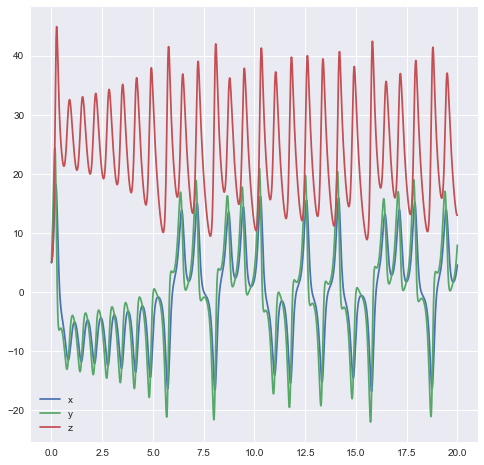

In [6]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
ax.plot(t, solx, label='x')
ax.plot(t, soly, label='y')
ax.plot(t, solz, label='z')
ax.legend()
plt.show()

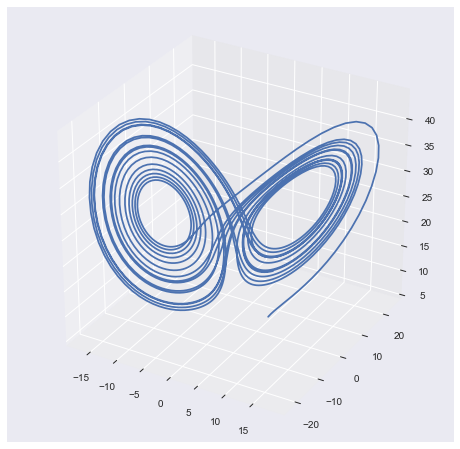

In [7]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(solx, soly, solz)
plt.show()

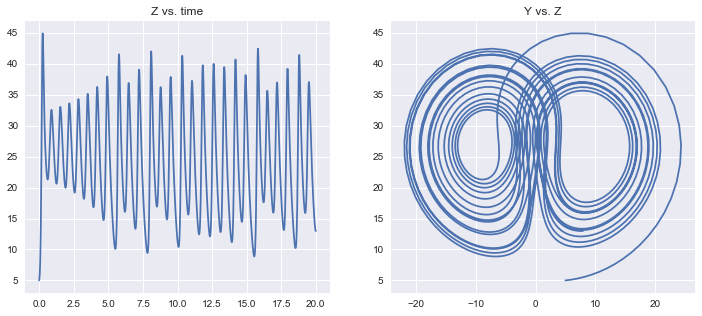

In [8]:
fig = plt.figure(figsize=(12,5))
ax1, ax2 = [fig.add_subplot(1,2,i+1) for i in range(2)]

ax1.plot(t, solz)
ax1.set_title("Z vs. time")
ax2.plot(soly, solz)
ax2.set_title("Y vs. Z")
plt.show()

In [9]:
from seaborn import xkcd_palette as xkcd

In [10]:
colorz = [xkcd([color])[0] for color in ['dark green', 'denim blue', 'brick red',
                                         'plum', 'olive green', 'azure',
                                         'turquoise blue', 'umber', 'marine']]
rz = [10, 30, 50,
      75, 100, 150,
      200, 300, 500]

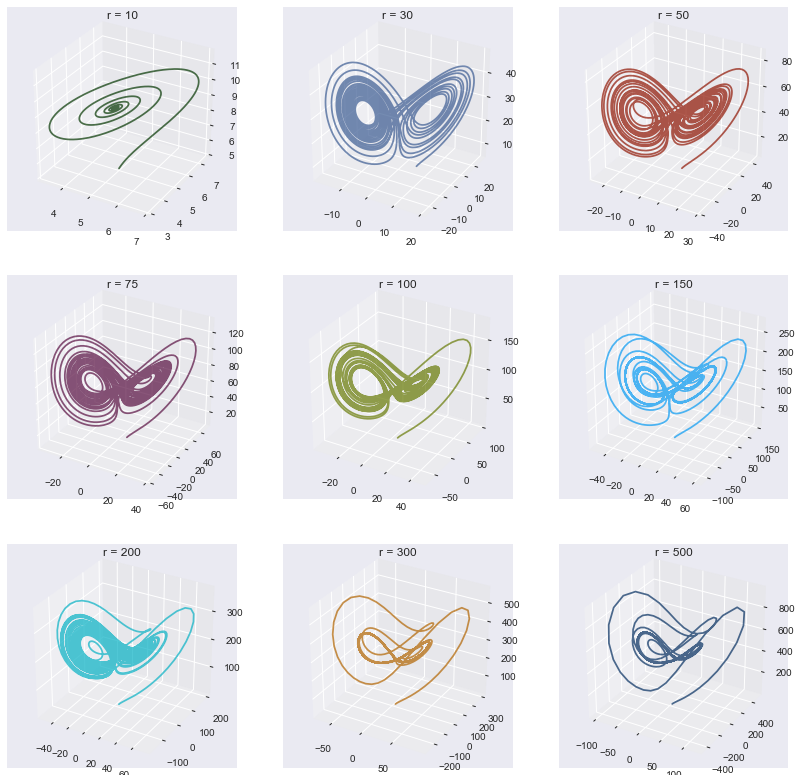

In [11]:
fig = plt.figure(figsize=(14,14))
axes = [fig.add_subplot(3, 3, i+1, projection='3d') for i in range(len(rz))]

for r, color, ax in zip(rz, colorz, axes):
    in_0 = [5.0, 5.0, 5.0]
    t, [solx, soly, solz] = get_lorenz_solution(in_0, 20, 5000, (10.0, 8/3, r))
    ax.plot(solx, soly, solz, color=color, alpha=0.7)
    ax.set_title("r = %d"%(r))
    
plt.show()